In [45]:
import numpy as np
import pandas as pd

---
# Дані з таблиці таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"
---

In [46]:
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'

df = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України', decimal=',', thousands='.')[0]
print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1     —
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

#1. Вивести перші рядки таблиці за допомогою методу head

In [47]:
df.head(3)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1


#2. Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [48]:
rows = df.shape[0]
columns = df.shape[1]
print(f"Кількість рядків: {rows}\nКількість стовпців: {columns}")

Кількість рядків: 28
Кількість стовпців: 9


#3. Замініть у таблиці значення "**—**" на значення NaN

In [49]:
df = df.replace('—', np.nan)
print(df.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN


#4. Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [50]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

#5. Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [52]:
df["2014"] = df["2014"].apply(pd.to_numeric, errors='coerce')
df["2019"] = df["2019"].apply(pd.to_numeric, errors='coerce')

# years = df.columns[1:].tolist()
# df[years] = df[years].astype(float)

df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

#6. Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [55]:
df.isnull().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

#7. Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [54]:
df.drop(df.index[-1], inplace=True)
print(df.tail(2))


         Регіон  1950  1960  1970  1990  2000  2012  2014  2019
25         Київ   NaN  17.4  15.9  12.0   7.3  12.0  12.1  11.0
26  Севастополь   NaN   NaN   NaN  12.5   7.0  12.0   NaN   NaN


#8. Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [79]:
years = df.columns[1:].tolist()

df[years] = df[years].apply(pd.to_numeric, errors='coerce')
df =  df.fillna(df[years].mean()).round(1)

print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.1   8.0
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   8.0
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   8.0
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

#9. Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [80]:
mean_data = df['2019'].mean().round(3)
above_average = df['2019'] > mean_data

regions = df.loc[above_average, 'Регіон'].tolist()
print(f'mean = {mean_data}')
for region in regions:
    region_value = df.loc[df['Регіон'] == region, '2019'].values[0]
    print(f'Region: {region}, 2019 value: {region_value}')

mean = 8.015
Region: Волинська, 2019 value: 10.1
Region: Закарпатська, 2019 value: 10.4
Region: Івано-Франківська, 2019 value: 8.8
Region: Львівська, 2019 value: 8.7
Region: Одеська, 2019 value: 8.8
Region: Рівненська, 2019 value: 10.7
Region: Херсонська, 2019 value: 8.1
Region: Чернівецька, 2019 value: 9.2
Region: Київ, 2019 value: 11.0


#10. У якому регіоні була найвища народжуваність у 2014 році?

In [81]:
max_region_2014 = df.loc[df['2014'] == df['2014'].max(), "Регіон"]
region_name = max_region_2014.iloc[0]
print(f'Найвища народжуваність у 2014 році була у регіоні - {region_name}')

Найвища народжуваність у 2014 році була у регіоні - Рівненська


#11. Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

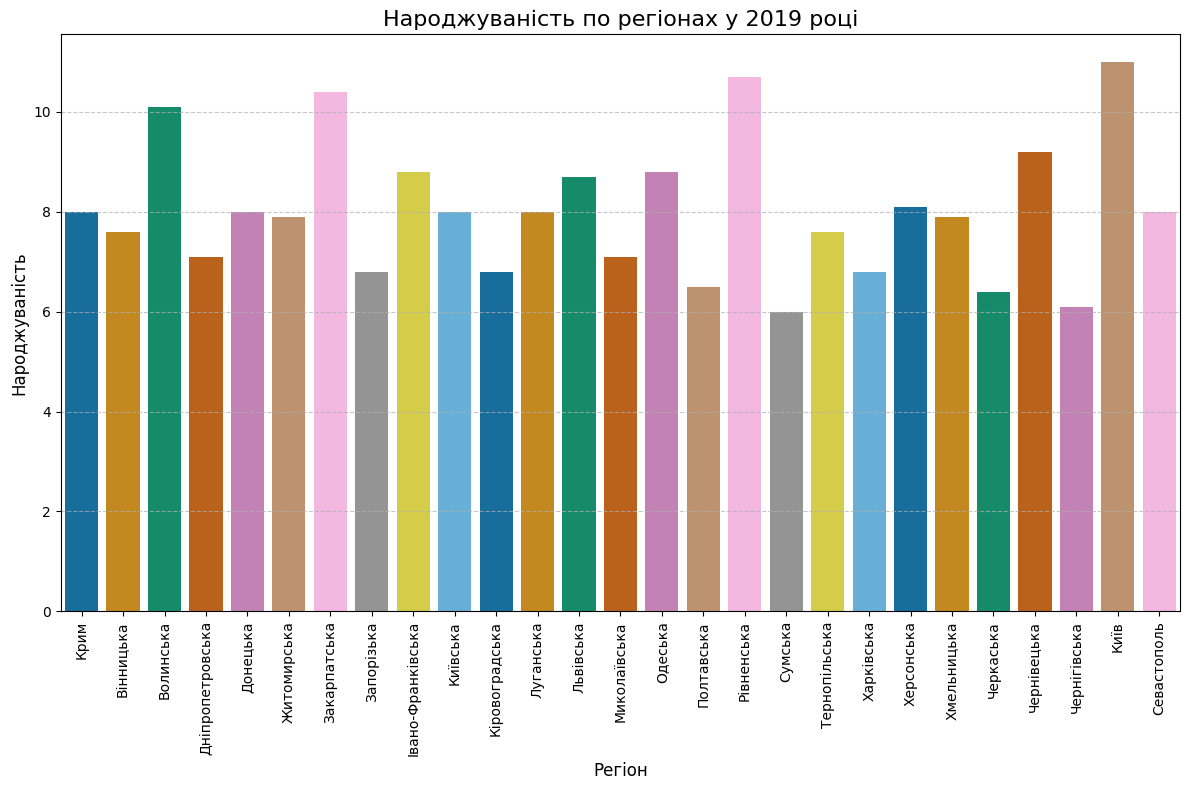

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# null_values = df.isnull().sum()
# print(f'We have null values in: {null_values}')

regions = df['Регіон']
birth_2019 = df['2019']

plt.figure(figsize=(12, 8))

sns.barplot(x=regions, y=birth_2019, estimator='mean', palette='colorblind', hue='Регіон', data=df)

plt.title('Народжуваність по регіонах у 2019 році', fontsize=16)

plt.xlabel('Регіон', fontsize=12)
plt.ylabel('Народжуваність', fontsize=12)

plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()